<a href="https://colab.research.google.com/github/WSmithDR/espol-bootcamp-data_science/blob/18%2F03%2F2025-Laboratorio_1/Copia_de_Laboratorio_01_Regresi%C3%B3n_Lineal_CBDS_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 01 - Regresión Lineal
Coding Bootcamps ESPOL, Machine Learning and Predictions, Cohorte II

Instructores: Galo Castillo López


En este laboratorio implementaremos modelos de regresion lineal simple y múltiple, utilizando `scikit-learn`, para predecir la eficiencia de vehiculos.  La variable objetivo corresponde a las millas por galón (MPG) de combustible utilizados.

La consigna en este laboratorio es contestar todos los **TODOs** a lo largo del notebook.

In [32]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [33]:
df = pd.read_csv('./millas_por_galon.csv')

In [34]:
df.head()

,nb_cilindros,desplazamiento,potencia,peso,aceleracion,anio,modeo,mpg
0,8,307.0,130.0,3504.0,12.0,70,"""chevrolet chevelle malibu""",18.0
1,8,350.0,165.0,3693.0,11.5,70,"""buick skylark 320""",15.0
2,8,318.0,150.0,3436.0,11.0,70,"""plymouth satellite""",18.0
3,8,304.0,150.0,3433.0,12.0,70,"""amc rebel sst""",16.0
4,8,302.0,140.0,3449.0,10.5,70,"""ford torino""",17.0


* nb_cilindros: la unidad de potencia del automóvil donde la gasolina se convierte en energía
* desplazamiento: desplazamiento del motor del auto
* potencia: tasa de rendimiento del motor en caballos de fuerza
* peso: el peso de un coche
* aceleracion: la aceleración del auto
* anio: anio en el que el auto fue lanzado al mercado
* origen: el origen del coche
* modelo: el nombre del auto
* mpg: Millaje/Millas por galón

In [35]:
df.describe()

,nb_cilindros,desplazamiento,peso,aceleracion,anio,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,46.600000


In [36]:
df

,nb_cilindros,desplazamiento,potencia,peso,aceleracion,anio,modeo,mpg
0,8,307.0,130.0,3504.0,12.0,70,"""chevrolet chevelle malibu""",18.0
1,8,350.0,165.0,3693.0,11.5,70,"""buick skylark 320""",15.0
2,8,318.0,150.0,3436.0,11.0,70,"""plymouth satellite""",18.0
3,8,304.0,150.0,3433.0,12.0,70,"""amc rebel sst""",16.0
4,8,302.0,140.0,3449.0,10.5,70,"""ford torino""",17.0
5,8,429.0,198.0,4341.0,10.0,70,"""ford galaxie 500""",15.0
6,8,454.0,220.0,4354.0,9.0,70,"""chevrolet impala""",14.0
7,8,440.0,215.0,4312.0,8.5,70,"""plymouth fury iii""",14.0
8,8,455.0,225.0,4425.0,10.0,70,"""pontiac catalina""",14.0
9,8,390.0,190.0,3850.0,8.5,70,"""amc ambassador dpl""",15.0


### **######### Todo #########**
Cree scatter plots entre las variables independientes y la variable objetivo. Responda las siguientes preguntas basado en sus visualizaciones.

* A su criterio, ¿qué variable(s) predictora(s) muestra menos relación con la variable objetivo?
* ¿Qué variables predictoras muestran una relación lineal con la variable objetivo? ¿Hay alguna con una relación no lineal?
* Si usted crea dos modelos, uno utiliza la variable `desplazamiento` y otro la variable `aceleracion` como variables predictoras (regresión lineal simple), ¿qué signos poseen los parámetros que acompañan a la variable independiente del modelo? En otras palabras, el signo de $\theta_1$ en $y=\theta_1x + \theta_0$.

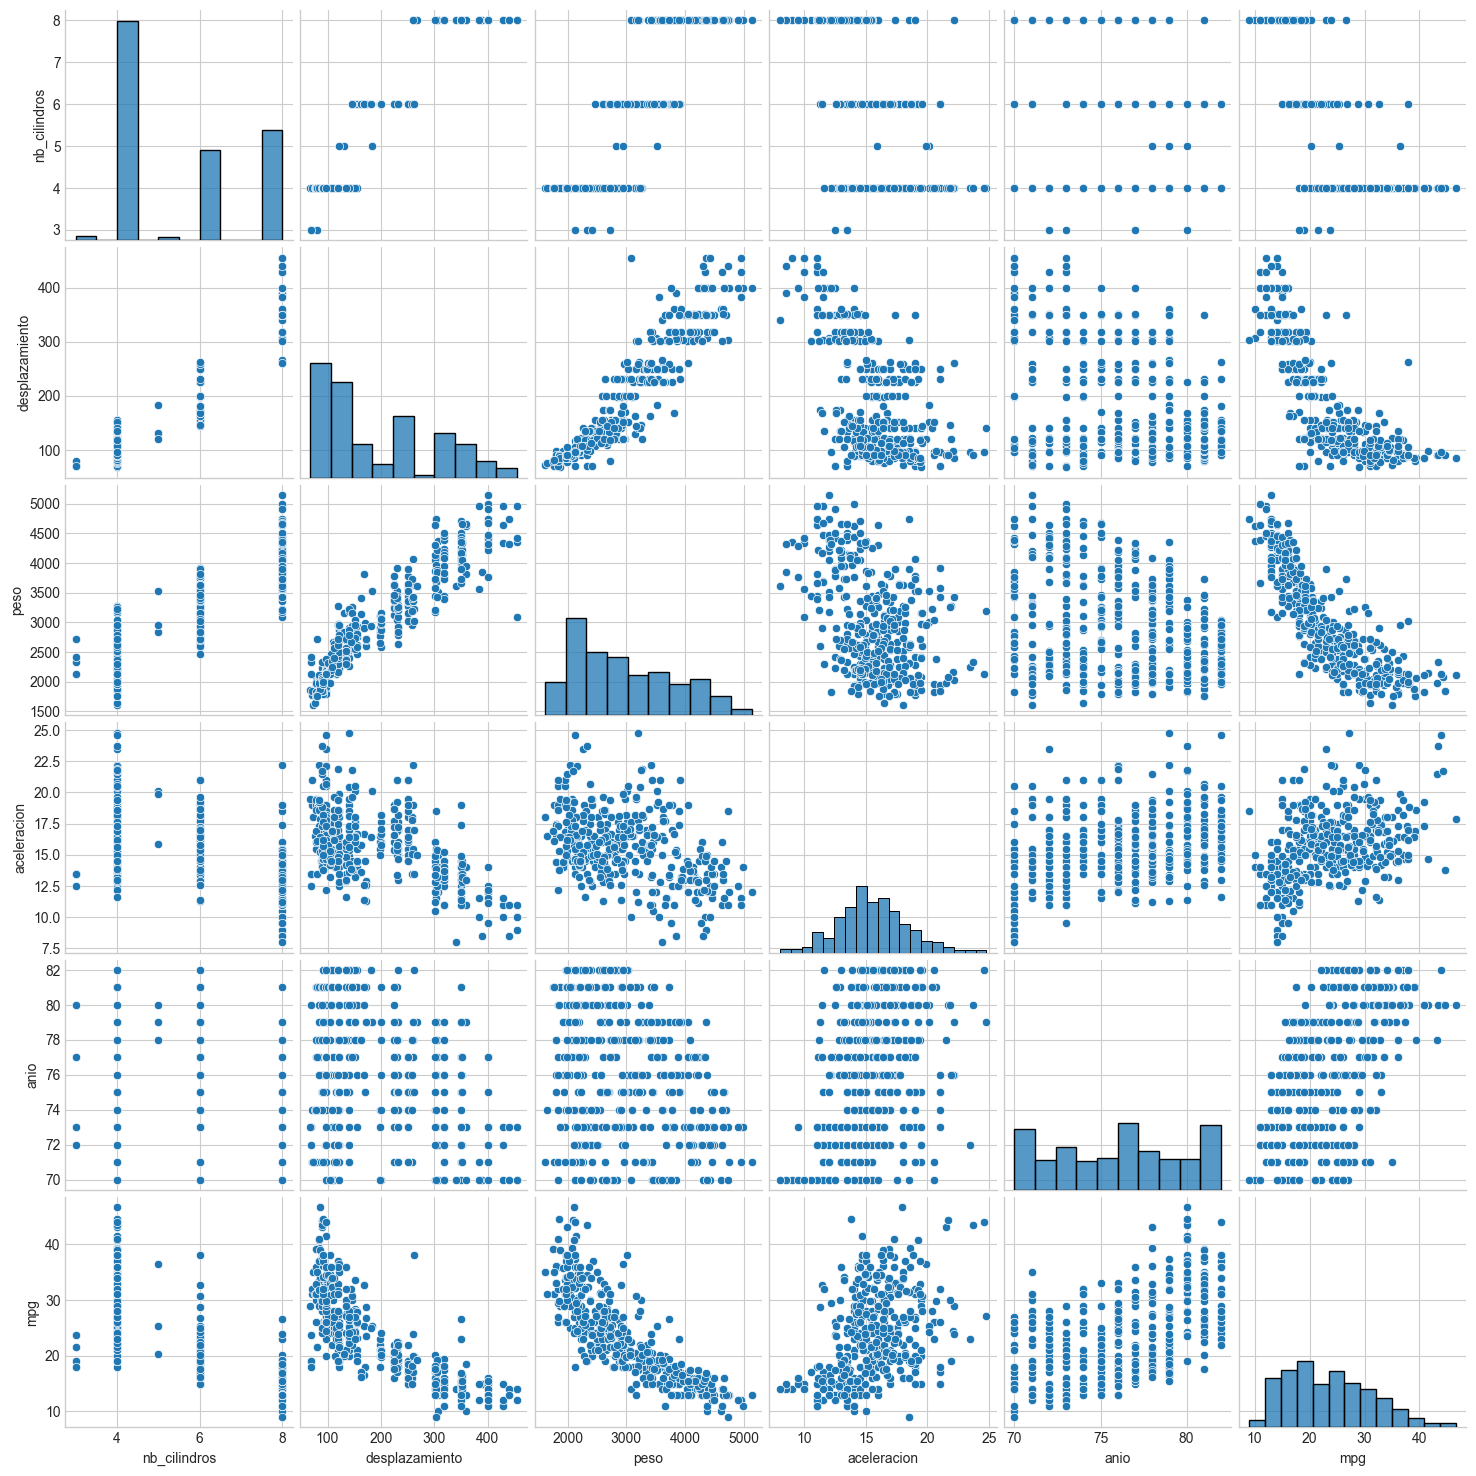

In [37]:
sns.pairplot(df)

## Parte 1: Regresión Lineal Simple

En esta parte del laboratorio entrenaremos un modelo de Regresión Lineal con una sola variable predictora.

In [38]:
from sklearn.model_selection import train_test_split
# Obtenemos nuestros datos de train y de test. Usaremos el 20% de los datos para test.

X = df[['nb_cilindros',	'desplazamiento',	'peso',	'aceleracion',	'anio']]

y = df['mpg']

X_train_tmp, X_test, y_train_tmp, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train_tmp, X_test, y_train_tmp, y_test


(     nb_cilindros  desplazamiento    peso  aceleracion  anio
 3               8           304.0  3433.0         12.0    70
 18              4            97.0  2130.0         14.5    70
 376             4            91.0  2025.0         18.2    82
 248             4            91.0  1800.0         16.4    78
 177             4           115.0  2694.0         15.0    75
 63              8           400.0  4385.0         12.0    72
 246             4            78.0  1985.0         19.4    78
 352             4            98.0  2380.0         20.7    81
 108             4            97.0  2279.0         19.0    73
 90              8           429.0  4952.0         11.5    73
 231             8           400.0  4325.0         12.2    77
 334             3            70.0  2420.0         12.5    80
 118             4           116.0  2158.0         15.5    73
 218             4            79.0  1825.0         18.6    77
 210             6           156.0  2930.0         15.5    76
 378    


### **######### Todo #########**

En este laboratorio usaremos hold-out validation, considerando el 20% de los datos de entrenamiento obtenidos previamente para validación. A partir de `X_train_tmp` y `y_train_tmp` obtenga  `X_train`, `X_val`, `y_train` y `y_val`. Considere utilizar el método `train_test_split`.

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X_train_tmp, y_train_tmp, test_size=0.20, random_state=42)

In [40]:
######### TODO #########
### Seleccione la variable que de acuerdo a usted puede modelar mejor la eficiencia.
### La variable predictor_vars debe ser una lista con el nombre de una variable.
### Escribe tu código debajo en 1 línea
nom_variable_1 = 'peso'

predictor_vars = [nom_variable_1]

In [41]:
import sklearn
from sklearn.linear_model import LinearRegression

# Entrenamos nuestro modelo usando la variable que elegimos.
model_simple = LinearRegression()
model_simple.fit(X=X_train[predictor_vars], y=y_train)

LinearRegression()

In [42]:
######### TODO #########
### Obtenga las predicciones de su modelo sobre X_val y almacénelas en
# la variable y_simple_pred. Use el modelo model_simple que entrenamos anteriormente.
### Escribe tu código debajo en 1 línea
y_simple_pred = model_simple.predict(X_val[predictor_vars])

In [43]:
type(y_simple_pred)

numpy.ndarray

In [44]:
y_simple_pred

array([27.9796764 , 26.83681114, 13.44031103, 18.12530174,  8.59637878,
       25.94371113, 15.04486358, 25.30037638, 22.17452635, 20.49428736,
       31.58235101, 29.84156286, 32.07431288, 22.91625348, 21.23601448,
       17.48953564, 29.51611116, 24.0515501 , 28.44136369, 25.22468994,
       23.2114306 , 26.39782978, 23.63527467, 22.59837042, 26.49622215,
       29.27391455, 21.60687804, 31.2039188 , 24.08939332, 10.26148049,
       28.40352047, 12.88780001, 25.48959248, 29.76587642, 21.78095686,
       28.75924675, 27.6542247 , 15.07513816, 17.88310513, 17.45926106,
       28.06293149, 31.0147027 , 28.70626624, 33.86808154, 31.05254592,
       32.45274508, 30.97685948, 25.48959248, 13.7279195 , 29.64477811,
       32.75549085, 14.6361568 , 24.96735604, 24.12723654, 21.51605431,
       31.21905609, 26.28430012, 21.0846416 , 19.89636447, 17.0883975 ,
       17.65604581, 29.99293574, 28.66842302, 14.21988137])

In [45]:
y_simple_pred.size

64

In [46]:
X_val.shape

(64, 5)

In [47]:
######### TODO #########
### Obtenga la evaluación de su modelo usando las siguientes tres métricas:
# MAE, MSE, R2 (coeficiente de determinación).
# Revise la documentación de sklearn: https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cálculo de métricas
mae = mean_absolute_error(y_val, y_simple_pred)
mse = mean_squared_error(y_val, y_simple_pred)
r2 = r2_score(y_val, y_simple_pred)

# Resultados
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Absolute Error (MAE): 3.17
Mean Squared Error (MSE): 19.11
R^2 Score: 0.73


### **######### Todo #########**
Interprete el resultado obtenido sobre el rendimiento de su modelo.

## Parte 2: Regresión Lineal Múltiple

En esta parte del laboratorio entrenaremos un modelo de Regresión Lineal con dos variables predictoras.

In [48]:
######### TODO #########
### Seleccione otra variable que de acuerdo a usted puede modelar adecuadamente la eficiencia.
### La variable predictor_vars_2 debe será una lista con los nombres de las 2 variables seleccionadas.
### Escribe tu código debajo en 1 línea
nom_variable_2 = 'desplazamiento'

predictor_vars_2 = [nom_variable_1, nom_variable_2]

In [49]:
model_multiple_1 = LinearRegression()
model_multiple_1.fit(X=X_train[predictor_vars_2], y=y_train)

LinearRegression()

In [50]:
# Obtenemos nuevamente las predicciones del modelo nuevo
y_multiple_pred_1 = model_multiple_1.predict(X_val[predictor_vars_2])

In [51]:
######### TODO #########
### Obtenga la evaluación de su modelo usando las siguientes tres métricas:
# MAE, MSE, R2 (coeficiente de determinación).
# Revise la documentación de sklearn: https://scikit-learn.org/stable/modules/model_evaluation.html

mae = mean_absolute_error(y_val, y_multiple_pred_1)
mse = mean_squared_error(y_val, y_multiple_pred_1)
r2 = r2_score(y_val, y_multiple_pred_1)

# Resultados
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Absolute Error (MAE): 3.23
Mean Squared Error (MSE): 19.01
R^2 Score: 0.73


### **######### Todo #########**
Interprete el resultado obtenido sobre el rendimiento de su modelo. Compare el rendimiento del nuevo modelo con el primer modelo evaluado. ¿Cambió el rendimiento? ¿Mejoró o empeoró? ¿Por qué?

Regresion simple:
Mean Absolute Error (MAE): 3.17
Mean Squared Error (MSE): 19.11
R^2 Score: 0.73
Regresion multiple:
Mean Absolute Error (MAE): 3.23
Mean Squared Error (MSE): 19.01
R^2 Score: 0.73

En terminos prácticos, el rendimiento se mantiene. Si bien es cierto que MAE y MSE han cambiado ligeramente. cCon la adicion del 'desplazamiento' R^2 Score no ha cambiado, haciendo que esta variable no aporte como un nuevo factor que influya en la eficiencia del combustible.

Ahora entrenaremos un nuevo modelo con los datos escalados.

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler_1 = MinMaxScaler()
scaler_1.fit(X_train[predictor_vars_2])

X_train_scaled = scaler_1.transform(X_train[predictor_vars_2])

In [53]:
# Entrenamos el modelo
model_multiple_2 = LinearRegression()
model_multiple_2.fit(X=X_train_scaled, y=y_train)

LinearRegression()

In [54]:
# Predecimos y evaluamos el nuevo modelo
y_multiple_pred_2 = model_multiple_2.predict(X_val[predictor_vars_2])

######### TODO #########
### Obtenga la evaluación de su modelo usando las siguientes tres métricas:
# MAE, MSE, R2 (coeficiente de determinación).
# Revise la documentación de sklearn: https://scikit-learn.org/stable/modules/model_evaluation.html

mae = mean_absolute_error(y_val, y_multiple_pred_2)
mse = mean_squared_error(y_val, y_multiple_pred_2)
r2 = r2_score(y_val, y_multiple_pred_2)


# Resultados
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error (MAE): 55760.81
Mean Squared Error (MSE): 3362887501.20
R^2 Score: -48362541.47


### **######### Todo #########**

Interprete los resultaods obtenidos. ¿Por qué el error es muy alto?. Escriba recomendaciones para evitar obtener errores altos.

La predicciones presentan un grado de error muy alto porque el modelo fue entrando con datos escalados, pero estamos haciendo que prediga datos brindandole datos a la variables predictores sin haberlos escalado previamente. Esto debería arreglarse escalando los datos de la variables predictoras.

Ahora escalaremos los datos del conjunto de validación.

In [55]:
X_val_scaled = scaler_1.transform(X_val[predictor_vars_2])

In [56]:
# Predecimos y evaluamos el nuevo modelo
y_multiple_pred_3 = model_multiple_2.predict(X_val_scaled)

######### TODO #########
### Obtenga la evaluación de su modelo usando las siguientes tres métricas:
# MAE, MSE, R2 (coeficiente de determinación).
# Revise la documentación de sklearn: https://scikit-learn.org/stable/modules/model_evaluation.html
mae = mean_absolute_error(y_val, y_multiple_pred_3)
mse = mean_squared_error(y_val, y_multiple_pred_3)
r2 = r2_score(y_val, y_multiple_pred_3)

# Resultados
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error (MAE): 3.23
Mean Squared Error (MSE): 19.01
R^2 Score: 0.73


### **######### Todo #########**

* Interprete los resultaods obtenidos. ¿Qué ocurrió ahora con respecto a la anterior evaluación?

Regresion simple:
Mean Absolute Error (MAE): 3.17
Mean Squared Error (MSE): 19.11
R^2 Score: 0.73
Regresion multiple:
Mean Absolute Error (MAE): 3.23
Mean Squared Error (MSE): 19.01
R^2 Score: 0.73
Regresion multiple con los datos escalados totalmente:
Mean Absolute Error (MAE): 3.23
Mean Squared Error (MSE): 19.01
R^2 Score: 0.73

Las métricas de errores se mantienen iguales dejando en evidencia que el proceso de escalado fue llevado correctamente.

### **######### Todo #########**

* Escriba debajo el código necesario para entrenar nuevos modelos (al menos 1 adicional) utilizando tantas variables desee. Encuentre sobre los datos de validación cuál modelo obtiene el mejor rendimiento.
* Interprete los resultados obtenidos.
* Utilizando las predicciones de su mejor modelo, realice un scatter plot de Valor real vs Predicciones (eje horizontal corresponde al valor que predice su modelo sobre los registros de validación y el eje vertical son sus respectivos valores reales de MPG. ¿Cómo deberían de visualizarse los datos en el escenario óptimo (un modelo perfecto)?

In [57]:
# Definir variables predictoras (todas las numéricas excepto la objetivo y ['nb_cilindros','aceleracion','desplazamiento'])
all_predictors = ['peso', 'anio']

Nota: Al principio me dispuse a trabajar con todas las demas variables distintas a la objectica y al ver que que la efectividad del modelo aumentó, me aventuré a explorar las variables que hacían la mejor combiancion en este contexto y estas fueron las ganadores del concurso, segun yo.

In [58]:
# Escalar datos
from sklearn.preprocessing import MinMaxScaler
scaler_all = MinMaxScaler()
X_train_all_scaled = scaler_all.fit_transform(X_train[all_predictors])
X_val_all_scaled = scaler_all.transform(X_val[all_predictors])


In [59]:
# Entrenar modelo
model_all = LinearRegression()
model_all.fit(X_train_all_scaled, y_train)

LinearRegression()

In [60]:
# Predecir y evaluar
y_all_pred = model_all.predict(X_val_all_scaled)

In [61]:
mae_all = mean_absolute_error(y_val, y_all_pred)
mse_all = mean_squared_error(y_val, y_all_pred)
r2_all = r2_score(y_val, y_all_pred)

print(f"Modelo con peso + anio:")
print(f"MAE: {mae_all:.2f}")
print(f"MSE: {mse_all:.2f}")
print(f"R²: {r2_all:.2f}")

Modelo con peso + anio:
MAE: 2.86
MSE: 13.74
R²: 0.80


Regresion simple:
Mean Absolute Error (MAE): 3.17
Mean Squared Error (MSE): 19.11
R^2 Score: 0.73

Regresion multiple con aceleracion y desplazamiento:
Mean Absolute Error (MAE): 3.23
Mean Squared Error (MSE): 19.01
R^2 Score: 0.73

Regresion multiple con los datos escalados totalmente:
Mean Absolute Error (MAE): 3.23
Mean Squared Error (MSE): 19.01
R^2 Score: 0.73

Modelo con todas las variables:
MAE: 2.87
MSE: 13.74
R²: 0.80

Modelo con solo aceleracion y año:
Modelo con todas las variables:
MAE: 2.86
MSE: 13.74
R²: 0.80

Modelo con solo desplazameinto y año:
Modelo con todas las variables:
MAE: 3.26
MSE: 17.84
R²: 0.74


### **######### Todo #########**

* Escriba debajo el código necesario para evaluar el mejor modelo obtenido con los datos de prueba.
* Interprete los resultados obtenidos.

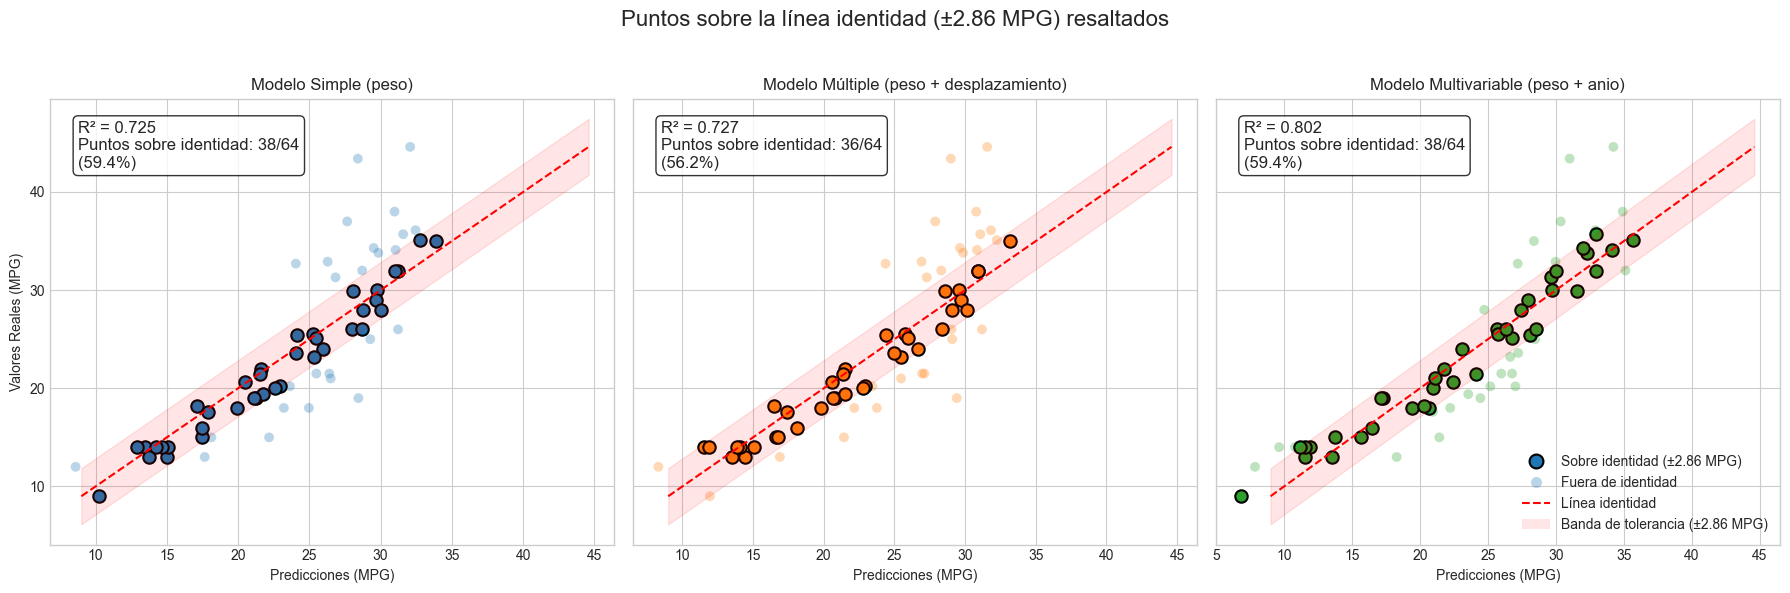

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.metrics import r2_score

# Configuración estética para mejores visualizaciones
plt.style.use('seaborn-v0_8-whitegrid')
base_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Función para contar puntos cercanos a la línea identidad
def count_points_on_identity(y_pred, y_true, tolerance=0.5):
    """
    Cuenta cuántos puntos están dentro de una tolerancia dada de la línea identidad.
    
    Args:
        y_pred: Valores predichos
        y_true: Valores reales
        tolerance: Distancia máxima a la línea identidad para considerar un punto como "sobre la línea"
    
    Returns:
        int: Número de puntos que intersectan (aproximadamente) con la línea identidad
    """
    distances = np.abs(y_pred - y_true)
    return np.sum(distances <= tolerance)

# Establecer la tolerancia como una variable ajustable
tolerance = 2.86  # CAMBIAR ESTE VALOR PARA AJUSTAR LA TOLERANCIA

# Visualización con énfasis en puntos sobre la línea identidad
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle(f'Puntos sobre la línea identidad (±{tolerance} MPG) resaltados', fontsize=16)

# Función para destacar puntos que están sobre la línea identidad
def highlight_identity_points(ax, y_pred, y_true, base_color, tolerance):
    # Calcular distancias a la línea identidad
    distances = np.abs(y_pred - y_true)
    
    # Crear máscaras para puntos sobre y fuera de la línea identidad
    on_identity = distances <= tolerance
    off_identity = ~on_identity
    
    # Dibujar puntos que están fuera de la línea identidad con color más claro
    if np.any(off_identity):
        ax.scatter(y_pred[off_identity], y_true[off_identity], 
                 color=mcolors.to_rgba(base_color, 0.3), s=50, edgecolor='none')
    
    # Dibujar puntos que están sobre la línea identidad con color más intenso y contorno
    if np.any(on_identity):
        ax.scatter(y_pred[on_identity], y_true[on_identity], 
                 color=base_color, s=80, edgecolor='black', linewidth=1.5)

# Calcular conteos para cada modelo usando la tolerancia especificada
total_points = len(y_val)
count_1 = count_points_on_identity(y_simple_pred, y_val, tolerance)
count_2 = count_points_on_identity(y_multiple_pred_1, y_val, tolerance)
count_3 = count_points_on_identity(y_all_pred, y_val, tolerance)
percentage_1 = (count_1 / total_points) * 100
percentage_2 = (count_2 / total_points) * 100
percentage_3 = (count_3 / total_points) * 100

# Modelo 1
highlight_identity_points(axes[0], y_simple_pred, y_val, base_colors[0], tolerance)
axes[0].plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--')
axes[0].set_xlabel('Predicciones (MPG)')
axes[0].set_ylabel('Valores Reales (MPG)')
axes[0].set_title('Modelo Simple (peso)')

# Añadir banda de tolerancia
x_line = np.array([min(y_val), max(y_val)])
axes[0].fill_between(x_line, x_line - tolerance, x_line + tolerance, color='red', alpha=0.1)

axes[0].text(0.05, 0.95, 
             f'R² = {r2_score(y_val, y_simple_pred):.3f}\n'
             f'Puntos sobre identidad: {count_1}/{total_points}\n'
             f'({percentage_1:.1f}%)',
             transform=axes[0].transAxes, fontsize=12,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Modelo 2
highlight_identity_points(axes[1], y_multiple_pred_1, y_val, base_colors[1], tolerance)
axes[1].plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--')
axes[1].set_xlabel('Predicciones (MPG)')
axes[1].set_title('Modelo Múltiple (peso + desplazamiento)')

# Añadir banda de tolerancia
axes[1].fill_between(x_line, x_line - tolerance, x_line + tolerance, color='red', alpha=0.1)

axes[1].text(0.05, 0.95, 
             f'R² = {r2_score(y_val, y_multiple_pred_1):.3f}\n'
             f'Puntos sobre identidad: {count_2}/{total_points}\n'
             f'({percentage_2:.1f}%)',
             transform=axes[1].transAxes, fontsize=12,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Modelo 3
highlight_identity_points(axes[2], y_all_pred, y_val, base_colors[2], tolerance)
axes[2].plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--')
axes[2].set_xlabel('Predicciones (MPG)')
axes[2].set_title('Modelo Multivariable (peso + anio)')

# Añadir banda de tolerancia
axes[2].fill_between(x_line, x_line - tolerance, x_line + tolerance, color='red', alpha=0.1)

axes[2].text(0.05, 0.95, 
             f'R² = {r2_score(y_val, y_all_pred):.3f}\n'
             f'Puntos sobre identidad: {count_3}/{total_points}\n'
             f'({percentage_3:.1f}%)',
             transform=axes[2].transAxes, fontsize=12,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Añadir leyenda
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=base_colors[0], 
           markersize=10, markeredgecolor='k', markeredgewidth=1.5, 
           label=f'Sobre identidad (±{tolerance} MPG)'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=mcolors.to_rgba(base_colors[0], 0.3), 
           markersize=8, markeredgecolor='none', 
           label='Fuera de identidad'),
    Line2D([0], [0], linestyle='--', color='r', label='Línea identidad'),
    Patch(facecolor='red', alpha=0.1, label=f'Banda de tolerancia (±{tolerance} MPG)')
]

# Añadir leyenda en el tercer gráfico
axes[2].legend(handles=legend_elements, loc='lower right', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])

* Elegí 3mpg como valor de tolerancia ya que el valor de mae que rondan los tres modelos es ese y vemos que los tres que el modelo multivaible (peso+anio) acera con 36/64, un punto por encima de los otros dos modelos. 
* 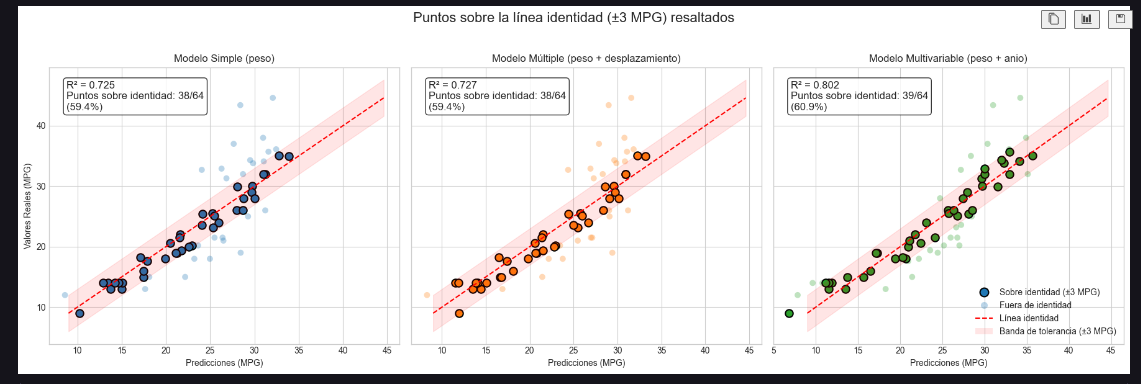
* Si lo bajamos a 2mpg, gana el modelo simple.
* 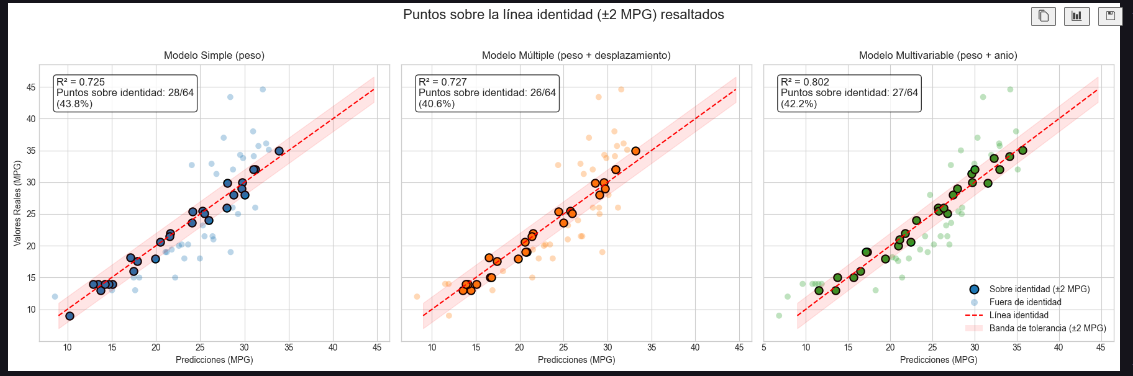
* Si lo bajamos a 1mpg, gana el modelo simple.
* 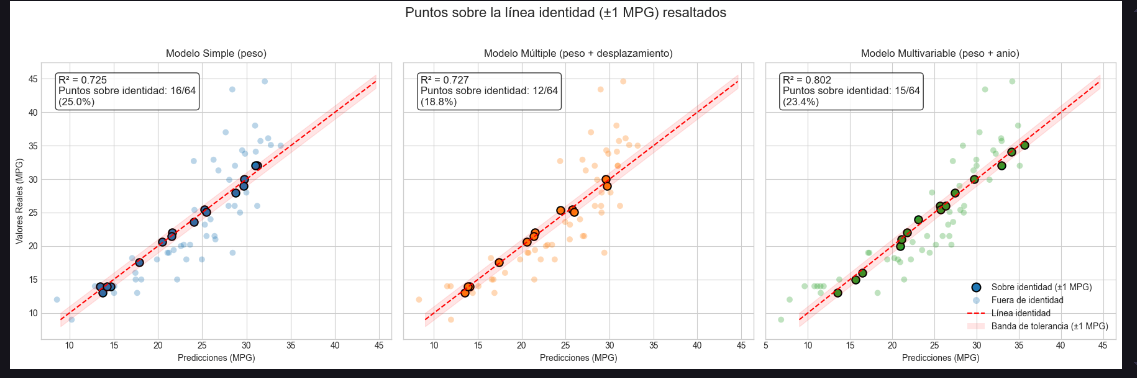
* Si lo baja,ps a 0.5mpg, el modelo (peso+anio) resulta ser el peor.
* 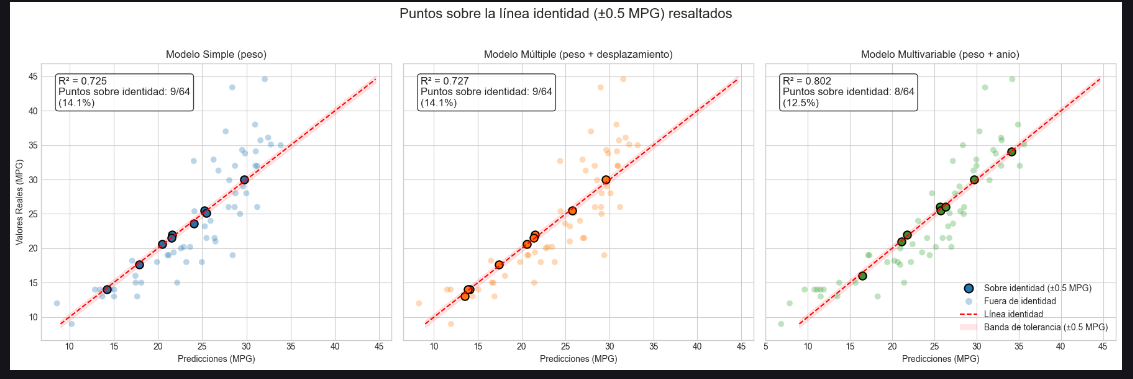
* A 0.25mpg, se mantiene la tendencia.
* 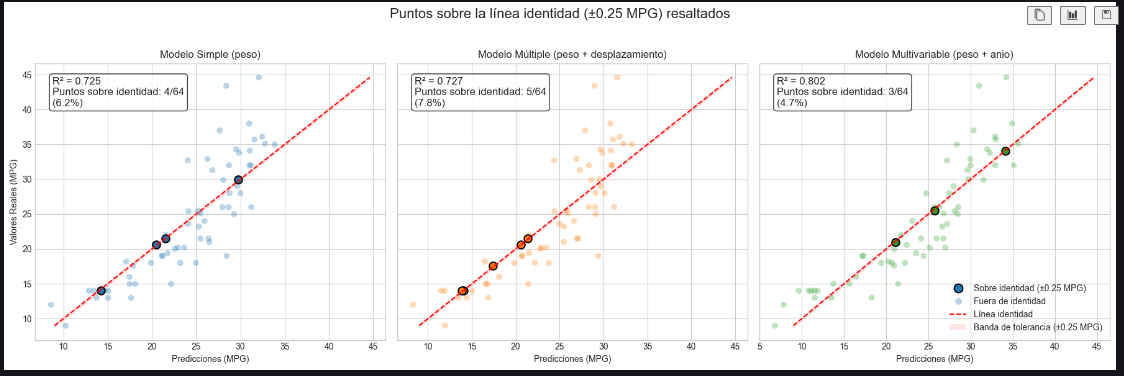
* A 0.12, los tres son igual de malos.
* 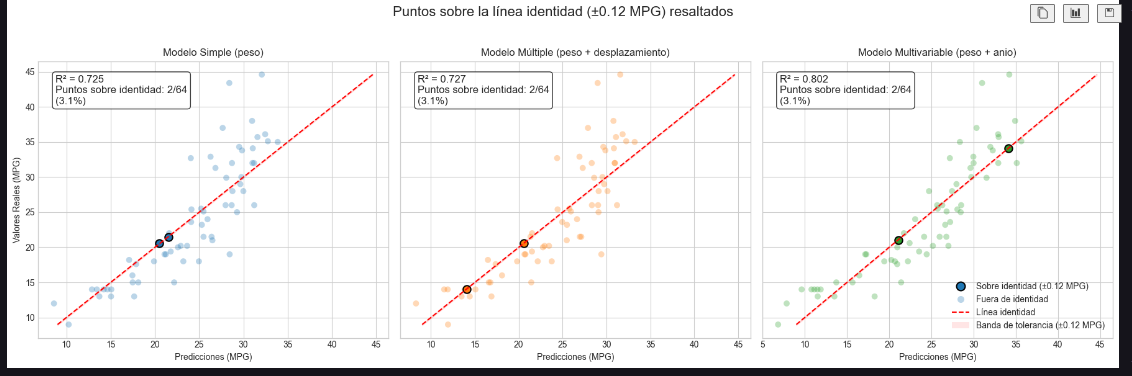
* A 2.86, que es el mae mas bajo dado por el modelo (peso+anio) resulta ser igual de efectivo que el simple.
* 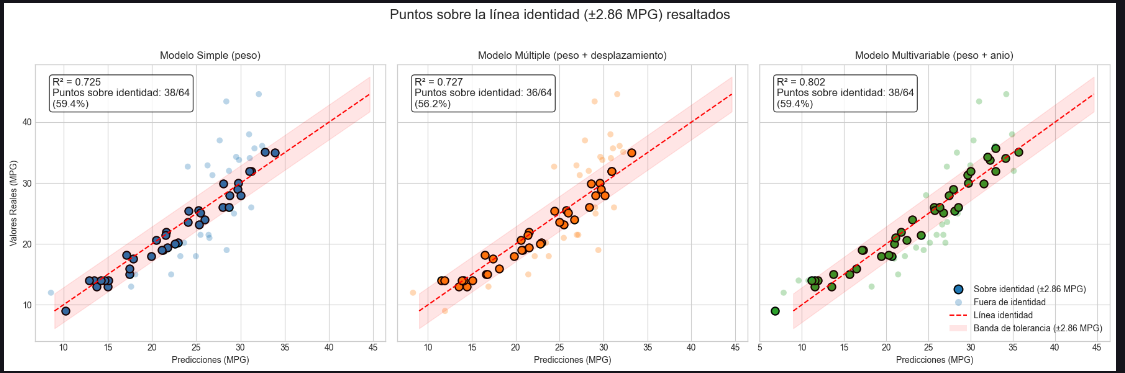

Con tan pocos datos para validar, resulta dificil decir con certeza cuál es el mejor. Si nos apegamos al concepto del coeficinete de determinación, diríamos que el mejor modelo el (peso + anio) ya que de las variables predictoras del detaset, esta combinacion indica que aproximadamente el 80% de la variabilidad en la eficiencia de combustible (MPG) entre los diferentes vehículos puede explicarse estas variables predictoras, siendo 80% el porcentaje mas alto obtenido entre las combinaciones realizadas.